# Scikit-learn : Modèles de classification 
Classification de vins à l'aide des *Support Vector Machine* (SVM)

# Préparation et modélisation des données

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

wine = pd.read_csv('wine.csv')

In [2]:
# Affichage des informations du DataFrame
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
wine.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Le DataFrame wine contient 14 colonnes. La classe de chaque vin est présente dans le première colonne ‘Wine’, les autres colonnes représentent la quantité des différentes composantes chimiques des vins. 
Aucune donnée n’est manquant. 


Remarquons que toutes les variables sont numérique mais des variables ont des échelles très différentes, il conviendra donc de les standardiser

In [4]:
# variable de stockage des features
data = wine.iloc[:, 1:14]

# Variable des données cibles
target = wine.iloc[:, 0]

In [5]:
# Décomposition des données en deux ensembles d'entraînement et de test
# par défaut l'échantillon est aléatoirement réparti
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

L'étape suivante est donc la Standardisation. La standardisation, ou normalisation des données est le processus de soustraction de la moyenne pour chaque variable, puis de leur division par l'écart type.

Centrer-réduire les variables les transformera en unités compatibles avec distribution de moyenne 0 et d'écart-type 1, indépendantes de leurs distributions et unités de mesures originales.

In [6]:
# Tblaue contenant les données centrées réduite de X_train
X_train_scaled = preprocessing.scale(X_train)

# Affichage de la moyenne et ecart type de X_Train_scaled
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[-6.12968205e-16 -1.68878995e-16  2.93974547e-16  1.02891092e-15
 -4.37834432e-16  3.44012768e-17  9.69490529e-17  8.28758032e-16
 -1.37605107e-16  8.75668864e-17  4.47216599e-16  5.82476164e-16
 -1.50114662e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Le nouveau tableau est donc bien standardisé, cependant cette méthode simple de preprocessing n'est pas toujours celle à préférer dans le cas d'une application réelle.

Pourquoi ? Pour la simple raison qu'il n'est pas possible d'appliquer cette même transformation à un échantillon de test, ou à des données nouvelles.
Il est possible évidemment de centrer et réduire n'importe quel échantillon de la même manière, mais avec une moyenne et un écart type qui seront différents de ceux utilisés sur l'ensemble d'entraînement
Les résultats obtenus ne seraient pas une juste représentation de la performance du modèle dans son ensemble, lorsqu'il sera appliqué à de nouvelles données.

Donc, plutôt que d'appliquer directement la fonction de normalisation, il est préférable d'utiliser une fonctionnalité de Scikit-Learn appelée Transformer API, qui vous permettra d'ajuster (fit) une étape de preprocessing en utilisant les données d'entraînement.
Ainsi lorsque la normalisation, par exemple, sera appliquée à d'autres échantillons, elle utilisera les mêmes moyennes et écart-types sauvegardés.

Pour créer cette étape de preprocessing 'ajustée' il suffit d'utiliser la fonction StandardScaler puis de l'ajuster grâce à aux données d'entraînement, de cette façon :

scaler = preprocessing.StandardScaler().fit(X_train)
Pour l'appliquer à un tableau de données par la suite il faudra simplement lui appliquer scaler.transform())

In [7]:
# Création d'un objet scaler appliquer à X_train
scaler = preprocessing.StandardScaler().fit(X_train)

# Tableau qui retourne X_train_Scaled centré-réduit
X_train_scaled = scaler.transform(X_train)

In [8]:
# Affichage moyenne et écart type des colonnes de X_train_scaled
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[-6.12968205e-16 -1.68878995e-16  2.93974547e-16  1.02891092e-15
 -4.37834432e-16  3.44012768e-17  9.69490529e-17  8.28758032e-16
 -1.37605107e-16  8.75668864e-17  4.47216599e-16  5.82476164e-16
 -1.50114662e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
# Tableai qui retourne X_test_scaled
X_test_scaled = scaler.transform(X_test)

 #Affichage moyenne et écart type de X_test_scaled
print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))

[-0.49678451 -0.07379596  0.28556323  0.51783944  0.40159816 -0.19948901
 -0.13453756  0.22476195 -0.22485248 -0.05964115 -0.23545684 -0.21293145
 -0.46462666]
[0.85147075 0.85107895 1.28806675 1.11518476 1.11835091 0.87062408
 1.01186547 1.02844859 0.95662152 1.0091224  0.98778105 0.99201677
 0.72686037]


Comme il fallait s'y attendre, les variables normalisées dans l'échantillon de test ne sont pas parfaitement centrées en zéro et de variance égale à 1, car nous transformons l'ensemble de test en utilisant les moyennes de l'ensemble d'apprentissage, et non pas de l'ensemble de test lui-même

# Classification par machines à vecteurs de support

Les séparateurs à vastes marges sont des classifieurs qui reposent sur deux idées clés, qui permettent de traiter des problèmes de discrimination non linéaire, et de reformuler le problème de classement comme un problème d'optimisation quadratique.

La résolution du problème de classification passe par la construction d'une fonction  ℎ
  qui à un vecteur d'entrée  𝑥
  fait correspondre une sortie  𝑦
  :  𝑦=ℎ(𝑥)
 . Le principe des SVM est le même pour la classification à l'aide de la régression logistique.

In [10]:
clf =svm.SVC(gamma=0.01, kernel='poly')
clf.fit(X_train_scaled, y_train)

SVC(gamma=0.01, kernel='poly')

# Evaluation du modèle de classification


Il est possible de calculer la prédiction pour les données présentes dans l'ensemble de test, et construire la matrice de confusion. 

In [13]:
y_pred = clf.predict(X_test_scaled)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,2
Classe réelle,
1,7
2,18
3,11


La matrice de confusion montre que la totalité des vins de l'ensemble de test ont été classés comme appartenant à la classe 2, alors qu'elle ne contient en réalité qu'un tiers des vins de l'échantillon. Notre modèle est donc aussi performant qu'un modèle purement aléatoire qui attribuerait une classe en la choisissant au hasard uniformément.

Est-ce le modèle qui est inapte sur ce type de données ou bien le paramétrage qui est inadapté ?

De nombreux algorithmes de machine learning, comme les SVM, reposent sur des hyperparamètres qui ne sont pas toujours évidents à déterminer pour obtenir les meilleures performances sur un jeu de données à traiter.

A la différence des paramètres simples du modèle qui découlent directement des données (par ex: les coefficients d'une régressions) les hyperparamètres permettent de décider de la structure du modèle et sont à régler avant l'entraînement de celui-ci.

Dans la majorité des cas, lorsque plusieurs hyperparamètres sont à régler, et qu'on ne sait pas lesquelles utiliser pour obtenir le meilleur modèle possible, la stratégie la plus efficace consiste en la création d'une grille de recherche.

In [14]:
# Dictionnaire paramètres contenant les valeurs possibles prises pour C, kernel, et gamma
parametres = {'C':[0.1,1,10], 'kernel':['rbf','linear', 'poly'], 'gamma':[0.001, 0.1, 0.5]}

In [16]:
# Application fonction model_selection.GridSearchCV
grid_clf = model_selection.GridSearchCV(estimator=clf, param_grid=parametres)

In [17]:
# Entrainement grid_clf sur l'ensemble d'entrainement
grille = grid_clf.fit(X_train_scaled,y_train)

In [18]:
# Affichage de toutes les combinaisons possibles d'hyperparamètres 
# et la performance moyenne du modèle associé par validation croisée.
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']]) 


                                            params  mean_test_score
0      {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}         0.573645
1   {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}         0.985961
2     {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}         0.459360
3        {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}         0.971921
4     {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}         0.985961
5       {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}         0.859360
6        {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}         0.573645
7     {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}         0.985961
8       {'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}         0.944335
9        {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}         0.837685
10    {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}         0.979064
11      {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}         0.459360
12         {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.965271
13      {'C': 1, 'gamma': 0.1, 'kernel': 'linear

Les résultats semblent déjà bien meilleurs avec le paramètre 'gamma=0.1 ou 0.5' pour les kernels 'poly' que le paramètre gamma= 0.01.

On remarque également que les scores moyens obtenus avec un kernel rbf lorsque le paramètre C est inférieur ou égal à 1 sont très variables. Mais certaines combinaisons de paramètres laissent penser qu'un noyau rbf serait plus adapté à nos données, puisque le taux moyen de bien classés surpasse les autres dans certains cas.

Les modèles à noyaux linéaires sont quant à eux efficaces et plus constants puisque le taux de bien classés des modèles avec 'kernel':'linear' est bon, quelle que soit la valeur de C (le paramètre gamma n'intervient pas).

L'attribut best_params_ du modèle créé permet d'afficher les paramètres ayant donné le meilleur score et retenus par défaut.

In [20]:
#Affichage des meilleurs paramètres de ma grille pour le modèle grid_clf
print(grid_clf.best_params_)

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


In [21]:
#Prédiction des features test et création de la matrice de confusion
y_pred = grid_clf.predict(X_test_scaled)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,1,2,3
Classe réelle,,,
1,7,0,0
2,0,17,1
3,0,0,11


La matrice de confusion est nettement meilleure que celle obtenue au début. Le taux de biens-classés, la sensibilité et la spécificité sont très élevés.
Le tuning d'hyperparamètres est donc une étape très utile et essentielle lors de la création de modèles, surtout lorsque l'on a plusieurs hyperparamètres importants, comme les SVM, et n'est donc pas à négliger.

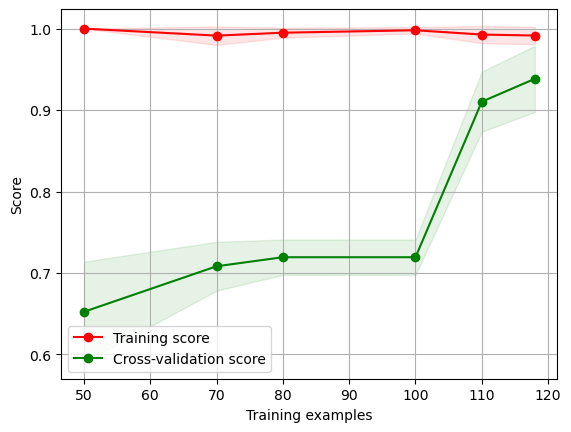

In [22]:
# Affichage courbe d'apprentissage du modèle
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 

train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear', C= 1), data, target, train_sizes=[50, 80, 110, 140], cv=5)

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes=[50, 70, 80, 100, 110, 118]

train_sizes, train_scores, test_scores = learning_curve(
    grid_clf, data, target, n_jobs=4, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

Les SVM sont appliqués à de très nombreux domaines. En effet, ces dernières possèdent des fondements mathématiques solides. La prédiction de la classe d'un échantillon donné est une décision rapide. La classification d’un nouvel exemple consiste à voir le signe de la fonction de décision ℎ𝜃(𝑥).
De plus, les exemples de test sont comparés juste avec les vecteurs supports et non pas avec tous les exemples d’apprentissage.
Cependant, ce modèle de classification est binaire de base d’où la nécessité d’utiliser l’approche un-contre-un. Et plus la quantité d’exemples en entrées est grande plus le calcul matriciel est complexe. Le temps de calcul est élevé lors d’une régularisation des paramètres de la fonction noyau.
